# Zeisel GOrilla Analysis: SGBM vs RF

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

## Load Zeisel data

In [82]:
zeisel_ex_path = '/media/tmo/data/work/datasets/zeisel/expression_sara_filtered.txt'
zeisel_tf_path = '/media/tmo/data/work/datasets/TF/mm9_TFs.txt'

In [88]:
zeisel_df = pd.read_csv(zeisel_ex_path, sep='\t')

In [98]:
zeisel_genes = list(zeisel_df['Unnamed: 0'])

In [101]:
shuffle(zeisel_genes)

In [102]:
len(zeisel_genes)

13063

# Create GOrilla lists of top regulated genes + background genes

In [119]:
GOrilla_GENES = ['Olig1', 'Rel', 'Tspan2', 'Neurod2', 'Lef1', 'Gli3', 'Dlx1']

In [120]:
def gorilla_list(df, TF, gene_names):
    targets = list(df[df['TF'] == TF].sort_values(by='importance', ascending=0)['target'])
    
    background = [gene for gene in gene_names if gene not in targets]
    
    return targets + background

#### SGBM GOrilla lists

In [124]:
for go_TF in GOrilla_GENES:
    go_list = gorilla_list(net_sgbm_df, go_TF, zeisel_genes)    
    pd.DataFrame(go_list).to_csv('GOrilla/SGBM/' + go_TF + '_sgbm_list.txt', index=False, header=False)        

#### RF GOrilla lists

In [125]:
for go_TF in GOrilla_GENES:
    go_list = gorilla_list(net_rf_df, go_TF, zeisel_genes)
    pd.DataFrame(go_list).to_csv('GOrilla/RF/' + go_TF + '_rf_list.txt', index=False, header=False)

# GO enrichment comparison

## Olig1

In [141]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Olig1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0008366,axon ensheathment,2.970000e-20
1,GO:0007272,ensheathment of neurons,2.970000e-20
2,GO:0042552,myelination,4.360000e-19
3,GO:0008610,lipid biosynthetic process,2.720000e-16
4,GO:0006629,lipid metabolic process,1.180000e-13


In [142]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Olig1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0008366,axon ensheathment,2.080000e-21
1,GO:0007272,ensheathment of neurons,2.080000e-21
2,GO:0042552,myelination,5.530000e-20
3,GO:0016126,sterol biosynthetic process,2.460000e-16
4,GO:1902653,secondary alcohol biosynthetic process,5.810000e-16


## Neurod2

In [144]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Neurod2.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0050804,modulation of chemical synaptic transmission,3.400000e-18
1,GO:0048167,regulation of synaptic plasticity,3.620000e-16
2,GO:0120035,regulation of plasma membrane bounded cell pro...,4.450000e-14
3,GO:0031344,regulation of cell projection organization,6.950000e-14
4,GO:0010769,regulation of cell morphogenesis involved in d...,3.000000e-13


In [143]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Neurod2.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0048167,regulation of synaptic plasticity,2.360000e-25
1,GO:0050804,modulation of chemical synaptic transmission,2.720000e-25
2,GO:0120035,regulation of plasma membrane bounded cell pro...,1.010000e-17
3,GO:0031344,regulation of cell projection organization,1.900000e-17
4,GO:0051960,regulation of nervous system development,3.840000e-17


## Gli3

In [146]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Gli3.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0015711,organic anion transport,3.330000e-08
1,GO:0009653,anatomical structure morphogenesis,1.840000e-07
2,GO:0006873,cellular ion homeostasis,2.820000e-07
3,GO:0015849,organic acid transport,4.440000e-07
4,GO:0046942,carboxylic acid transport,4.440000e-07


In [147]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Gli3.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0015711,organic anion transport,2.500000e-08
1,GO:0050801,ion homeostasis,1.130000e-07
2,GO:0006873,cellular ion homeostasis,2.940000e-07
3,GO:0098771,inorganic ion homeostasis,3.390000e-07
4,GO:0042940,D-amino acid transport,3.470000e-07


## Lef1

In [148]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Lef1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:1904018,positive regulation of vasculature development,3.710000e-11
1,GO:1901342,regulation of vasculature development,7.990000e-11
2,GO:0045766,positive regulation of angiogenesis,8.540000e-11
3,GO:0045765,regulation of angiogenesis,1.510000e-10
4,GO:0001525,angiogenesis,2.790000e-10


In [149]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Lef1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:1901342,regulation of vasculature development,2.870000e-14
1,GO:0001525,angiogenesis,3.390000e-14
2,GO:0045765,regulation of angiogenesis,5.980000e-14
3,GO:1904018,positive regulation of vasculature development,5.240000e-13
4,GO:0045766,positive regulation of angiogenesis,9.820000e-13


## Rel

In [151]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Rel.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0006952,defense response,1.810000e-13
1,GO:0002376,immune system process,4.090000e-13
2,GO:0006955,immune response,6.420000e-13
3,GO:0002684,positive regulation of immune system process,5.960000e-12
4,GO:0050778,positive regulation of immune response,8.550000e-11


In [152]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Rel.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0006952,defense response,1.980000e-19
1,GO:0006954,inflammatory response,1.340000e-16
2,GO:0006955,immune response,4.440000e-15
3,GO:0002376,immune system process,2.990000e-13
4,GO:0002684,positive regulation of immune system process,4.330000e-13


## Tspan2

In [153]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Tspan2.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0070535,histone H2A K63-linked ubiquitination,0.000143
1,GO:0009048,dosage compensation by inactivation of X chrom...,0.000145
2,GO:0052200,response to host defenses,0.000178
3,GO:0052173,response to defenses of other organism involve...,0.000178
4,GO:0075136,response to host,0.000178


In [154]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Tspan2.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0070535,histone H2A K63-linked ubiquitination,0.000143
1,GO:0009048,dosage compensation by inactivation of X chrom...,0.000145
2,GO:0052200,response to host defenses,0.000178
3,GO:0052173,response to defenses of other organism involve...,0.000178
4,GO:0075136,response to host,0.000178


## Dlx1

In [156]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Dlx1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0043269,regulation of ion transport,5.640000e-08
1,GO:0042133,neurotransmitter metabolic process,4.720000e-07
2,GO:0001505,regulation of neurotransmitter levels,5.870000e-07
3,GO:0007610,behavior,9.640000e-07
4,GO:0023052,signaling,1.890000e-06


In [157]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Dlx1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0007610,behavior,4.670000e-11
1,GO:0043269,regulation of ion transport,1.740000e-09
2,GO:0023052,signaling,8.660000e-09
3,GO:0007267,cell-cell signaling,1.040000e-07
4,GO:0099536,synaptic signaling,3.060000e-07


---

## SGBM

In [65]:
net_sgbm_df = pd.read_csv('zeisel_sgbm_100k.txt', sep='\t')

In [66]:
sgbm_tf_counts_df = pd.DataFrame(net_sgbm_df.TF.value_counts())
sgbm_tf_counts_df.reset_index(inplace=True)
sgbm_tf_counts_df.columns=['TF', 'count']

In [155]:
sgbm_tf_counts_df

,TF,count
0,Ywhae,2667
1,Tcf4,2353
2,Ywhaz,2311
3,Celf4,2272
4,Pkm,1965
5,Mapk1,1771
6,Tpi1,1535
7,Prnp,1519
8,Cycs,1377
9,Ran,1226


In [155]:
sgbm_tf_counts_df

,TF,count
0,Ywhae,2667
1,Tcf4,2353
2,Ywhaz,2311
3,Celf4,2272
4,Pkm,1965
5,Mapk1,1771
6,Tpi1,1535
7,Prnp,1519
8,Cycs,1377
9,Ran,1226


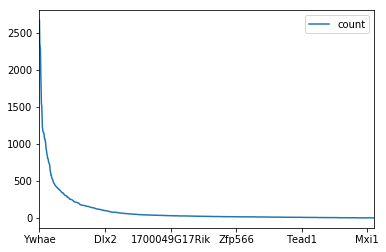

In [67]:
counts_df.plot()
plt.show()

## RF

In [17]:
net_rf_df = pd.read_csv('zeisel_rf_100k.txt', sep='\t')

In [46]:
rf_tf_counts_df = pd.DataFrame(net_rf_df.TF.value_counts(), index=None)
rf_tf_counts_df.reset_index(inplace=True)
rf_tf_counts_df.columns=['TF', 'count']

In [48]:
rf_tf_counts_df.head()

,TF,count
0,Ywhaz,3660
1,Celf4,3037
2,Pkm,2957
3,Ywhae,2637
4,Mapk1,2543


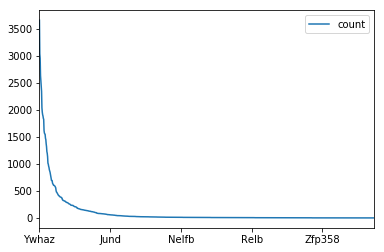

In [25]:
rf_tf_counts_df.plot()
plt.show()

In [53]:
merged = sgbm_tf_counts_df.merge(rf_tf_counts_df, on=['TF'])

In [55]:
merged.head()

,TF,count_x,count_y
0,Ywhae,2667,2637
1,Tcf4,2353,2343
2,Ywhaz,2311,3660
3,Celf4,2272,3037
4,Pkm,1965,2957


In [61]:
len(merged)

935

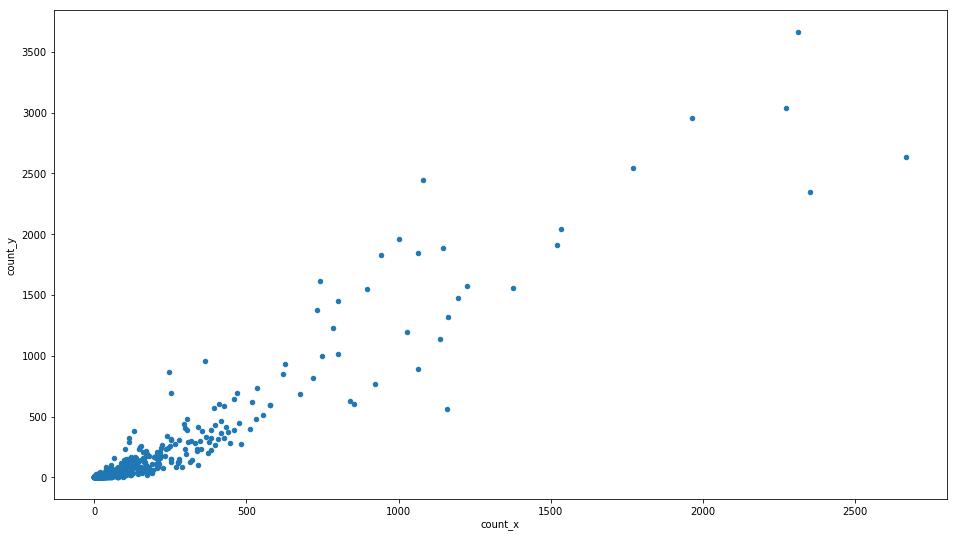

In [62]:
merged.plot.scatter(x='count_x', y='count_y', figsize=(16, 9))
plt.show()